## Kolmogorov-Smirnov Test

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Functions

In [2]:
def standardize(sample):
    # Standardize the data
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean)/std
    return sample_z    

## Regression evaluation with KS test

## Create synthetic datasets

In [3]:
size = 500

In [4]:
x_a = np.random.uniform(2, 8, size)
y_a = 0.83 * x_a + 2 + np.random.normal(loc = 0, scale = 1, size = size)

In [5]:
x_b = np.random.uniform(2, 15, size)
y_b = (x_b ** 2) + 1 + np.random.normal(loc = 0, scale = 5, size = size)

In [6]:
x_c = np.random.uniform(2, 20, size)
y_c = [(0.79 * x + 5 + np.random.normal(loc = 0, scale = (0.75 * x), size = 1))[0] for x in x_c]

<AxesSubplot:>

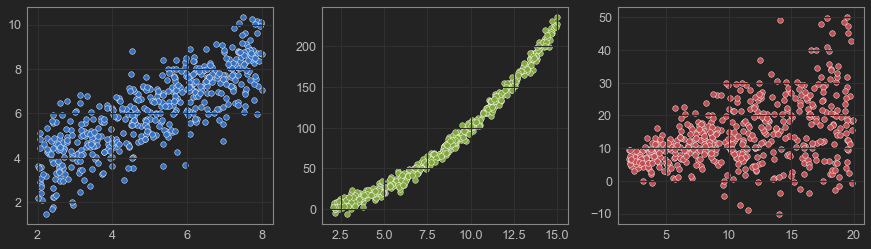

In [7]:
plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = x_a, y = y_a, ax = ax1, color = 'b')
sns.scatterplot(x = x_b, y = y_b, ax = ax2, color = 'g')
sns.scatterplot(x = x_c, y = y_c, ax = ax3, color = 'r')

### Fits a linear regressor for each case

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model_a = LinearRegression()
model_a.fit(x_a.reshape(-1, 1), y_a)
y_pred_a = model_a.predict(x_a.reshape(-1, 1))

In [24]:
model_c.intercept_

5.014480475947707

In [25]:
model_c.coef_

array([0.81681247])

In [11]:
model_b = LinearRegression()
model_b.fit(x_b.reshape(-1, 1), y_b)
y_pred_b = model_b.predict(x_b.reshape(-1, 1))

In [12]:
model_c = LinearRegression()
model_c.fit(x_c.reshape(-1, 1), y_c)
y_pred_c = model_c.predict(x_c.reshape(-1, 1))

<AxesSubplot:>

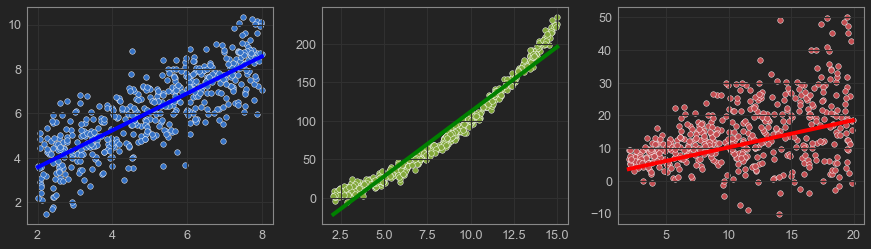

In [13]:
plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = x_a, y = y_a, ax = ax1, color = 'b')
sns.scatterplot(x = x_b, y = y_b, ax = ax2, color = 'g')
sns.scatterplot(x = x_c, y = y_c, ax = ax3, color = 'r')
sns.lineplot(x = [min(x_a), max(x_a)], y = model_a.predict(np.array([min(x_a), max(x_a)]).reshape(-1, 1)), ax = ax1, color = 'blue', linewidth =  4)
sns.lineplot(x = [min(x_b), max(x_b)], y = model_b.predict(np.array([min(x_b), max(x_b)]).reshape(-1, 1)), ax = ax2, color = 'green', linewidth =  4)
sns.lineplot(x = [min(x_c), max(x_c)], y = model_a.predict(np.array([min(x_c), max(x_c)]).reshape(-1, 1)), ax = ax3, color = 'red', linewidth =  4)

### Evaluates the regressors

In [14]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [15]:
def evaluate_regressor(y_real, y_pred):
    print(f"MAE: {mae(y_real, y_pred):.4f}")
    print(f"MSE: {mse(y_real, y_pred):.4f}")
    print(f"RMSE: {(mse(y_real, y_pred))**(1/2):.4f}")
    print(f"R2: {r2_score(y_real, y_pred):.4f}")

In [16]:
print("Model A:")
evaluate_regressor(y_a, y_pred_a)

Model A:
MAE: 0.8141
MSE: 1.0376
RMSE: 1.0186
R2: 0.6717


In [17]:
print("Model B:")
evaluate_regressor(y_b, y_pred_b)

Model B:
MAE: 11.0896
MSE: 174.5059
RMSE: 13.2101
R2: 0.9563


In [18]:
print("Model C:")
evaluate_regressor(y_c, y_pred_c)

Model C:
MAE: 6.5083
MSE: 78.1412
RMSE: 8.8397
R2: 0.1838


### Evaluates the normality of the residuals

In [19]:
residuals_a = y_a - y_pred_a
residuals_b = y_b - y_pred_b
residuals_c = y_c - y_pred_c

<AxesSubplot:ylabel='Count'>

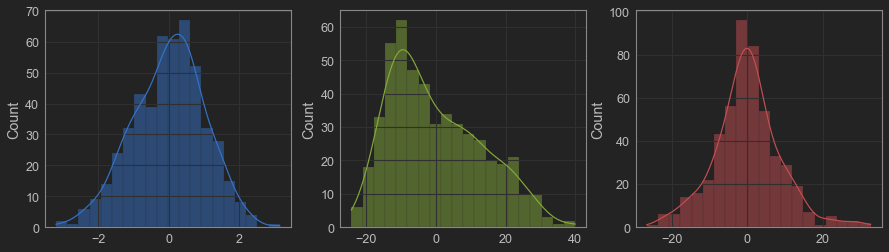

In [20]:
plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(residuals_a, color = 'b', ax = ax1, bins = 20, kde = True)
sns.histplot(residuals_b, color = 'g', ax = ax2, bins = 20, kde = True)
sns.histplot(residuals_c, color = 'r', ax = ax3, bins = 20, kde = True)

In [21]:
# Evaluates the KS test
ks_norm_a = stats.ks_1samp(x = standardize(residuals_a), cdf = stats.norm.cdf)
ks_norm_b = stats.ks_1samp(x = standardize(residuals_b), cdf = stats.norm.cdf)
ks_norm_c = stats.ks_1samp(x = standardize(residuals_c), cdf = stats.norm.cdf)

In [22]:
# Prints the results
print(f"norm_a: ks = {ks_norm_a.statistic:.4f} (p-value = {ks_norm_a.pvalue:.3e}, is normal = {ks_norm_a.pvalue > 0.05})")
print(f"norm_b: ks = {ks_norm_b.statistic:.4f} (p-value = {ks_norm_b.pvalue:.3e}, is normal = {ks_norm_b.pvalue > 0.05})")
print(f"norm_c: ks = {ks_norm_c.statistic:.4f} (p-value = {ks_norm_c.pvalue:.3e}, is normal = {ks_norm_c.pvalue > 0.05})")

norm_a: ks = 0.0357 (p-value = 5.354e-01, is normal = True)
norm_b: ks = 0.0976 (p-value = 1.345e-04, is normal = False)
norm_c: ks = 0.0683 (p-value = 1.795e-02, is normal = False)
